<a href="https://colab.research.google.com/github/MichalStrus/CNN_Classification/blob/main/CNN_dogs_vs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [80]:
!mkdir -p ~/..kaggle
!cp kaggle.json ~/.kaggle/

In [81]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [82]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip", 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [83]:
train_ds = tf.keras.utils.image_dataset_from_directory(directory = '/content/train',labels = 'inferred', label_mode = 'binary', batch_size = 32, image_size = (256,256))
test_ds = tf.keras.utils.image_dataset_from_directory(directory = '/content/test',labels = 'inferred', label_mode = 'binary', batch_size = 32, image_size = (256,256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [84]:
def normalize(image,label):
  image = tf.cast(image/255, tf.float32)
  return image,label
train_ds = train_ds.map(normalize)
test_ds = test_ds.map(normalize)


In [85]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [86]:
model = Sequential()
model.add(keras.layers.Conv2D(32, kernel_size =(3,3), activation = 'relu', input_shape = (256,256,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size =(3,3), activation = 'relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(128, kernel_size =(3,3), activation = 'relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [87]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [88]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, epochs=10, batch_size=64, validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 72s 109ms/step - loss: 1.4970 - accuracy: 0.5846 - val_loss: 2.5194 - val_accuracy: 0.5498
Epoch 2/10
625/625 [==============================] - 70s 111ms/step - loss: 0.5943 - accuracy: 0.6850 - val_loss: 0.6303 - val_accuracy: 0.6462
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5051 - accuracy: 0.7541 - val_loss: 0.5243 - val_accuracy: 0.7504
Epoch 4/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4437 - accuracy: 0.7943 - val_loss: 0.4925 - val_accuracy: 0.7618
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3910 - accuracy: 0.8256 - val_loss: 0.4916 - val_accuracy: 0.7640
Epoch 6/10
625/625 [==============================] - 66s 106ms/step - loss: 0.3012 - accuracy: 0.8709 - val_loss: 0.4733 - val_accuracy: 0.7992
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2298 - accuracy: 0.9051 - val_loss: 0.5197 - val_ac

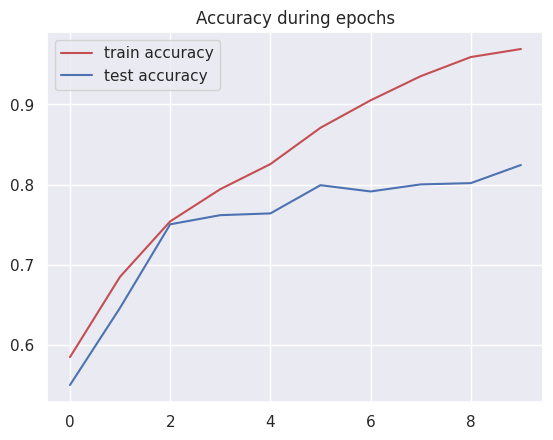

In [89]:
plt.plot(history.history['accuracy'], color = 'r', label = 'train accuracy')
plt.plot(history.history['val_accuracy'], color = 'b', label = 'test accuracy')
plt.title('Accuracy during epochs')
plt.legend()
plt.show()


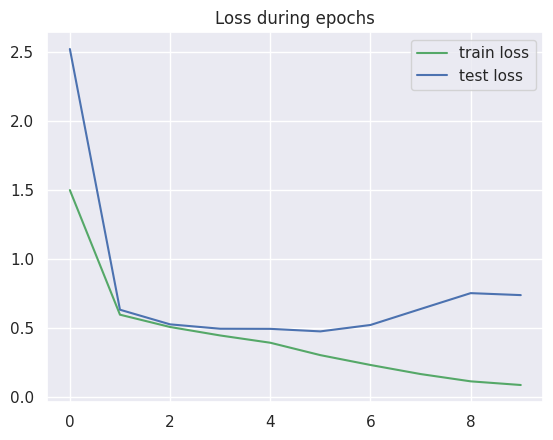

In [90]:
plt.plot(history.history['loss'], color = 'g', label = 'train loss')
plt.plot(history.history['val_loss'], color = 'b', label = 'test loss')
plt.title('Loss during epochs')
plt.legend()
plt.show()
